In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud

# Set default plotly template
pio.templates.default = "plotly_white"


#  Q.1: Show column names and have a look at their info.


In [2]:
import pandas as pd
#df=pd.read_csv('Instagram data.csv')
df = pd.read_csv('Instagram data.csv', encoding='ISO-8859-1')


print("Column Names:")
print(df.columns)

print("\nInfo:")
print(df.info())

Column Names:
Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dty

# Q.2: Show the descriptive statistics of the data.


In [3]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace df with the name of your DataFrame if it's different
descriptive_stats = df.describe()

# Display descriptive statistics
print(descriptive_stats)

        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

# Q.3: Check if your data contains any missing values


In [4]:
import pandas as pd

# Check for missing values in each column
missing_values = df.isnull().any()

# Print the result
print("Missing Values:")
print(missing_values)


Missing Values:
Impressions       False
From Home         False
From Hashtags     False
From Explore      False
From Other        False
Saves             False
Comments          False
Shares            False
Likes             False
Profile Visits    False
Follows           False
Caption           False
Hashtags          False
dtype: bool


# Q.4: When you start exploring your data, always start by exploring the main feature of your data. 
For example, as we are working on a dataset based on Instagram Reach, we should start by exploring the
 feature that contains data about reach. In our data, the Impressions column contains the data about the
 reach of an Instagram post. So let’s have a look at the distribution of the Impressions:

In [5]:
import plotly.express as px

# Assuming 'df' is your DataFrame and 'Impressions' is the column of interest
# Replace 'df' and 'Impressions' with the actual names if they are different
fig = px.histogram(df, x='Impressions', nbins=30, title='Distribution of Impressions')
fig.show()


# Q.5: Have a look at the number of impressions on each post over time as shown below


In [21]:
import pandas as pd

# Try reading the dataset with different encoding options
try:
    df = pd.read_csv("Instagram data.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv("Instagram data.csv", encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv("Instagram data.csv", encoding='latin1')

# Calculate the cumulative count of posts
cumulative_count = df.index + 1

# Add the cumulative count as a new column in the DataFrame
df['Cumulative Count'] = cumulative_count

# Analyze impressions over the sequential order of posts
impressions_over_time = df[['Cumulative Count', 'Impressions']]

print(impressions_over_time)

     Cumulative Count  Impressions
0                   1         3920
1                   2         5394
2                   3         4021
3                   4         4528
4                   5         2518
..                ...          ...
114               115        13700
115               116         5731
116               117         4139
117               118        32695
118               119        36919

[119 rows x 2 columns]


# Q.6: Have a look at all the metrics like Likes, Saves, and Follows from each post 

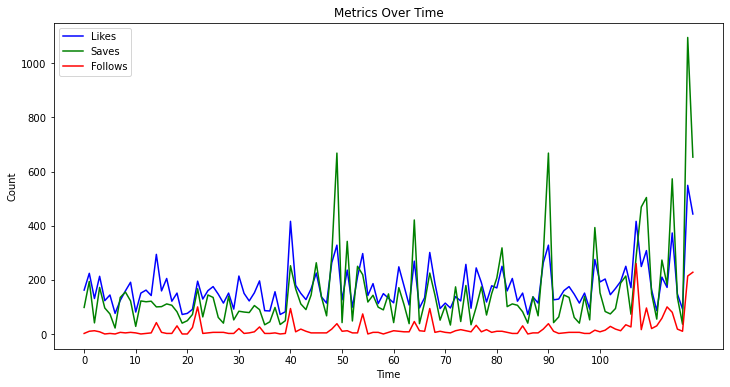

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named data with required columns and index

# Plotting
plt.figure(figsize=(12, 6))

# Plotting likes
plt.plot(df.index, df['Likes'], label='Likes', color='blue')

# Plotting saves
plt.plot(df.index, df['Saves'], label='Saves', color='green')

# Plotting follows
plt.plot(df.index, df['Follows'], label='Follows', color='red')

# Set title and labels
plt.title('Metrics Over Time')
plt.xlabel('Time')
plt.ylabel('Count')

# Set x-axis ticks from 0 to 100
ticks = np.linspace(0, 100, num=11, dtype=int)  # Generate ticks from 0 to 100
plt.xticks(ticks)

# Show legend
plt.legend()

# Show plot
plt.show()

# Q.7: Have a look at the distribution of reach from different sources as shown below


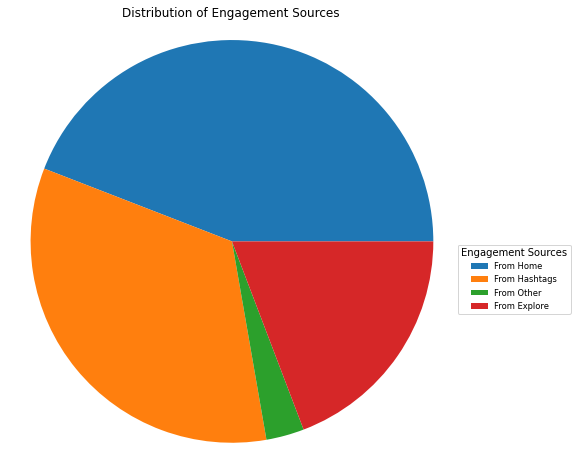

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Try different encoding formats
encoding_formats = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encoding_formats:
    try:
        # Load the dataset with specified encoding
        data = pd.read_csv("Instagram data.csv", encoding=encoding)
        
        # If successful, break the loop
        break
    except UnicodeDecodeError:
        # If decoding fails, try the next encoding format
        continue

# Extract engagement sources
engagement_sources = ['From Home', 'From Hashtags', 'From Other', 'From Explore']

# Calculate the sum of each engagement source
engagement_sum = data[engagement_sources].sum()

# Plot the distribution of engagement sources as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(engagement_sum) 
plt.title('Distribution of Engagement Sources')

# Add legend with small boxes indicating colors
plt.legend(engagement_sum.index, loc="best", fontsize='small', title="Engagement Sources", bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Q.8: Have a look at the distribution of engagement sources as shown below


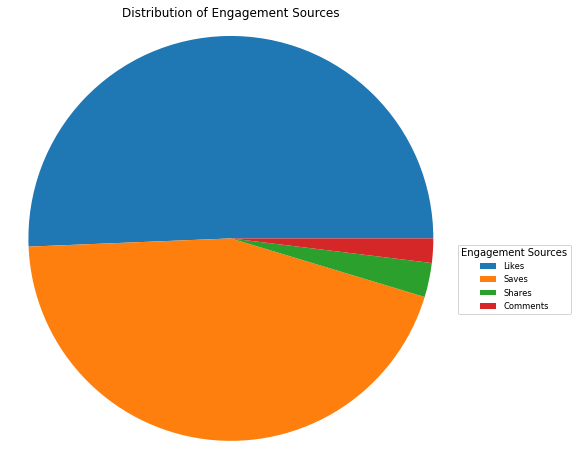

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Try different encoding formats
encoding_formats = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encoding_formats:
    try:
        # Load the dataset with specified encoding
        data = pd.read_csv("Instagram data.csv", encoding=encoding)
        
        # If successful, break the loop
        break
    except UnicodeDecodeError:
        # If decoding fails, try the next encoding format
        continue

# Extract engagement sources
engagement_sources = ['Likes', 'Saves', 'Shares', 'Comments']

# Calculate the sum of each engagement source
engagement_sum = data[engagement_sources].sum()

# Plot the distribution of engagement sources as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(engagement_sum) 
plt.title('Distribution of Engagement Sources')

# Add legend with small boxes indicating colors
plt.legend(engagement_sum.index, loc="best", fontsize='small', title="Engagement Sources", bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Q9 Relationship between the number of profile visits and follows 

C:\Users\PMLS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4



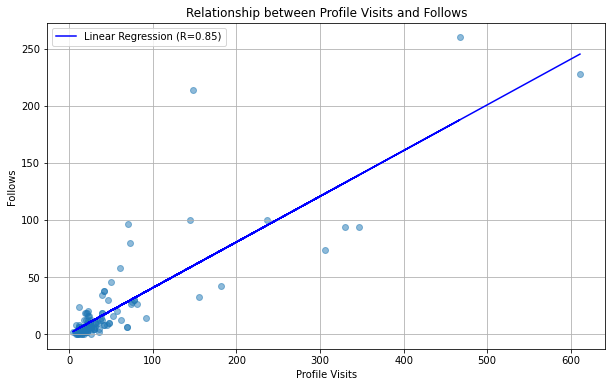

In [9]:
from scipy.stats import linregress
# Fit linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Profile Visits'], df['Follows'])
line = slope * df['Profile Visits'] + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Profile Visits'], df['Follows'], alpha=0.5)
plt.plot(df['Profile Visits'], line, color='blue', label=f'Linear Regression (R={r_value:.2f})')
plt.title('Relationship between Profile Visits and Follows')
plt.xlabel('Profile Visits')
plt.ylabel('Follows')
plt.legend()
plt.grid(True)
plt.show()

# Q11 correlation between all the features

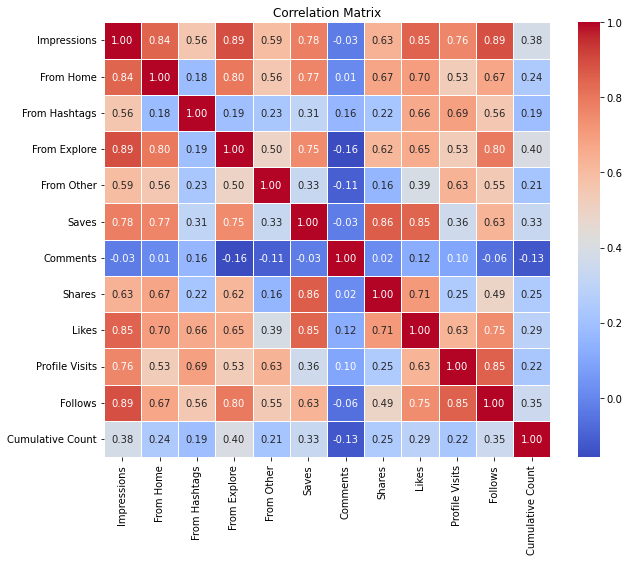

In [23]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Q.12: Distribution of hashtags

C:\Users\PMLS\AppData\Local\Temp/ipykernel_12628/3968615100.py:11: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



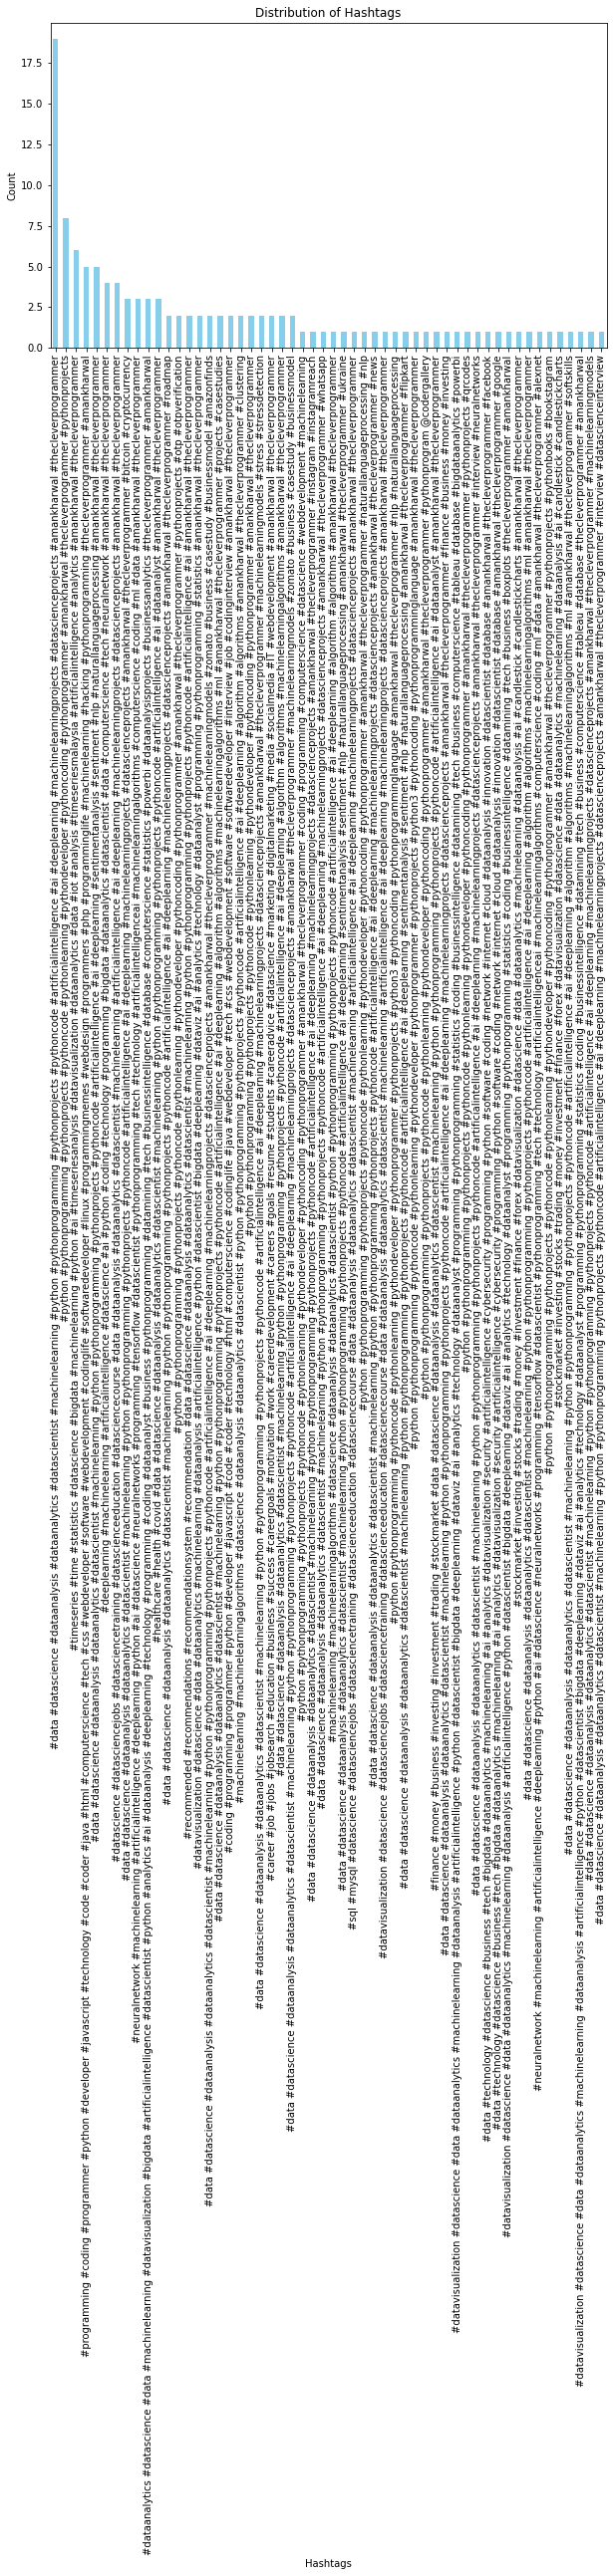

In [12]:
# Count the occurrences of each hashtag
hashtag_counts = df['Hashtags'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
hashtag_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Distribution of Hashtags')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Q13 Distribution of likes and impressions received from the presence of hashtag 

C:\Users\PMLS\AppData\Local\Temp/ipykernel_12628/3554358406.py:11: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



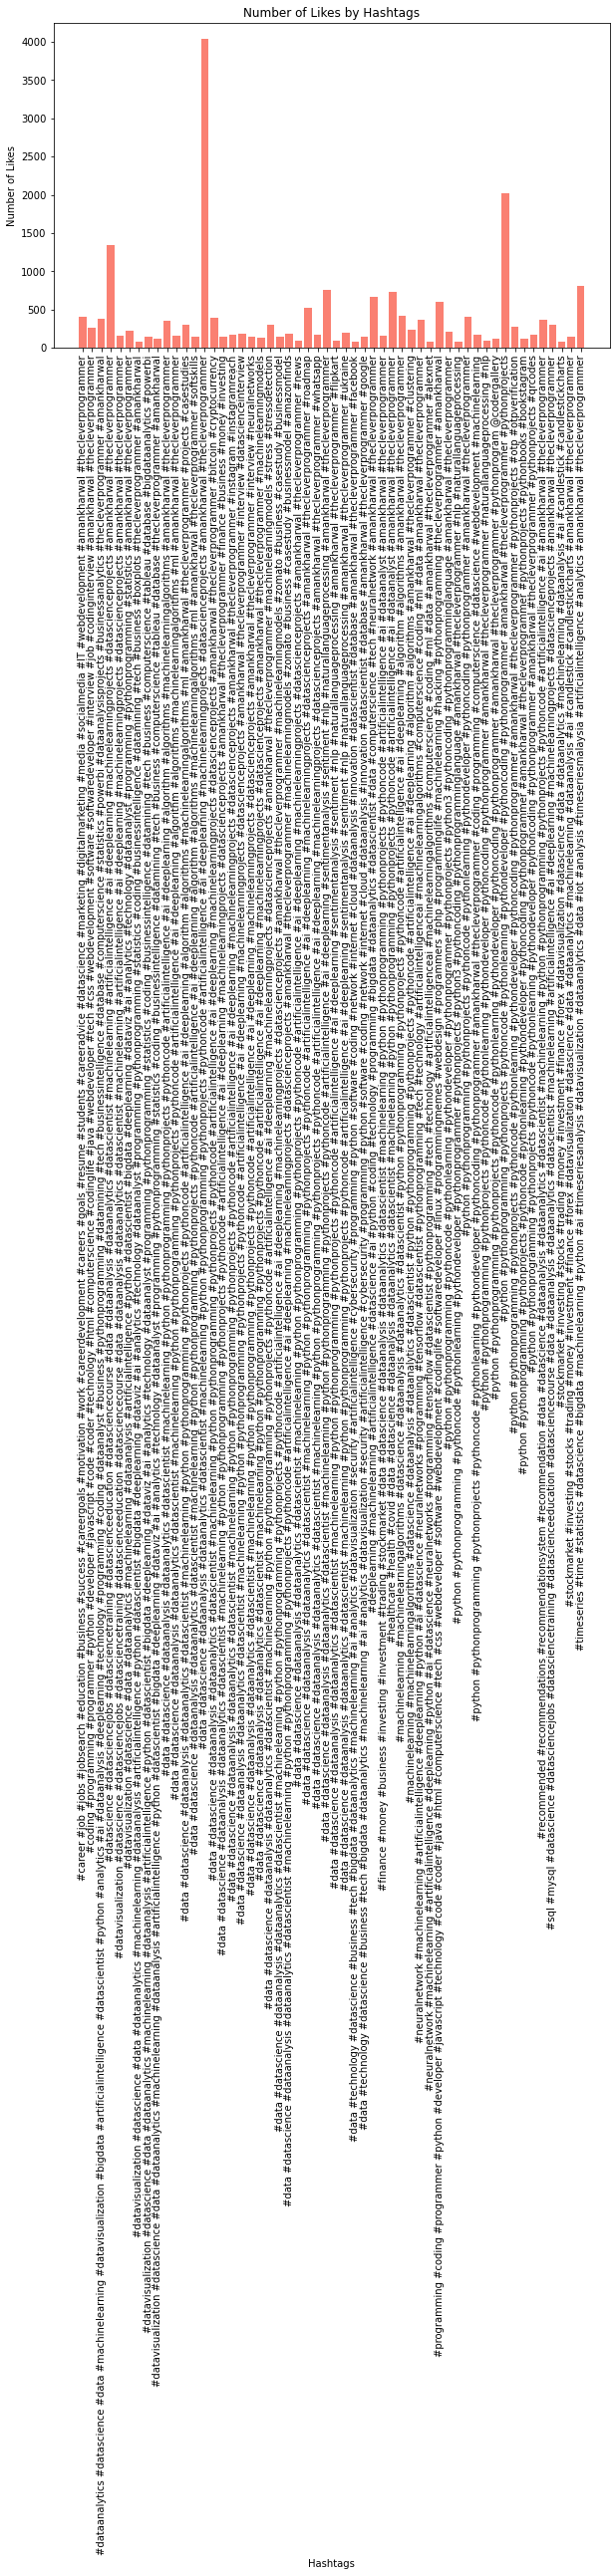

In [13]:
# Calculate total likes for each hashtag
likes_by_hashtag = df.groupby('Hashtags')['Likes'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(likes_by_hashtag['Hashtags'], likes_by_hashtag['Likes'], color='salmon')
plt.xlabel('Hashtags')
plt.ylabel('Number of Likes')
plt.title('Number of Likes by Hashtags')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\PMLS\AppData\Local\Temp/ipykernel_12628/3527704814.py:11: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



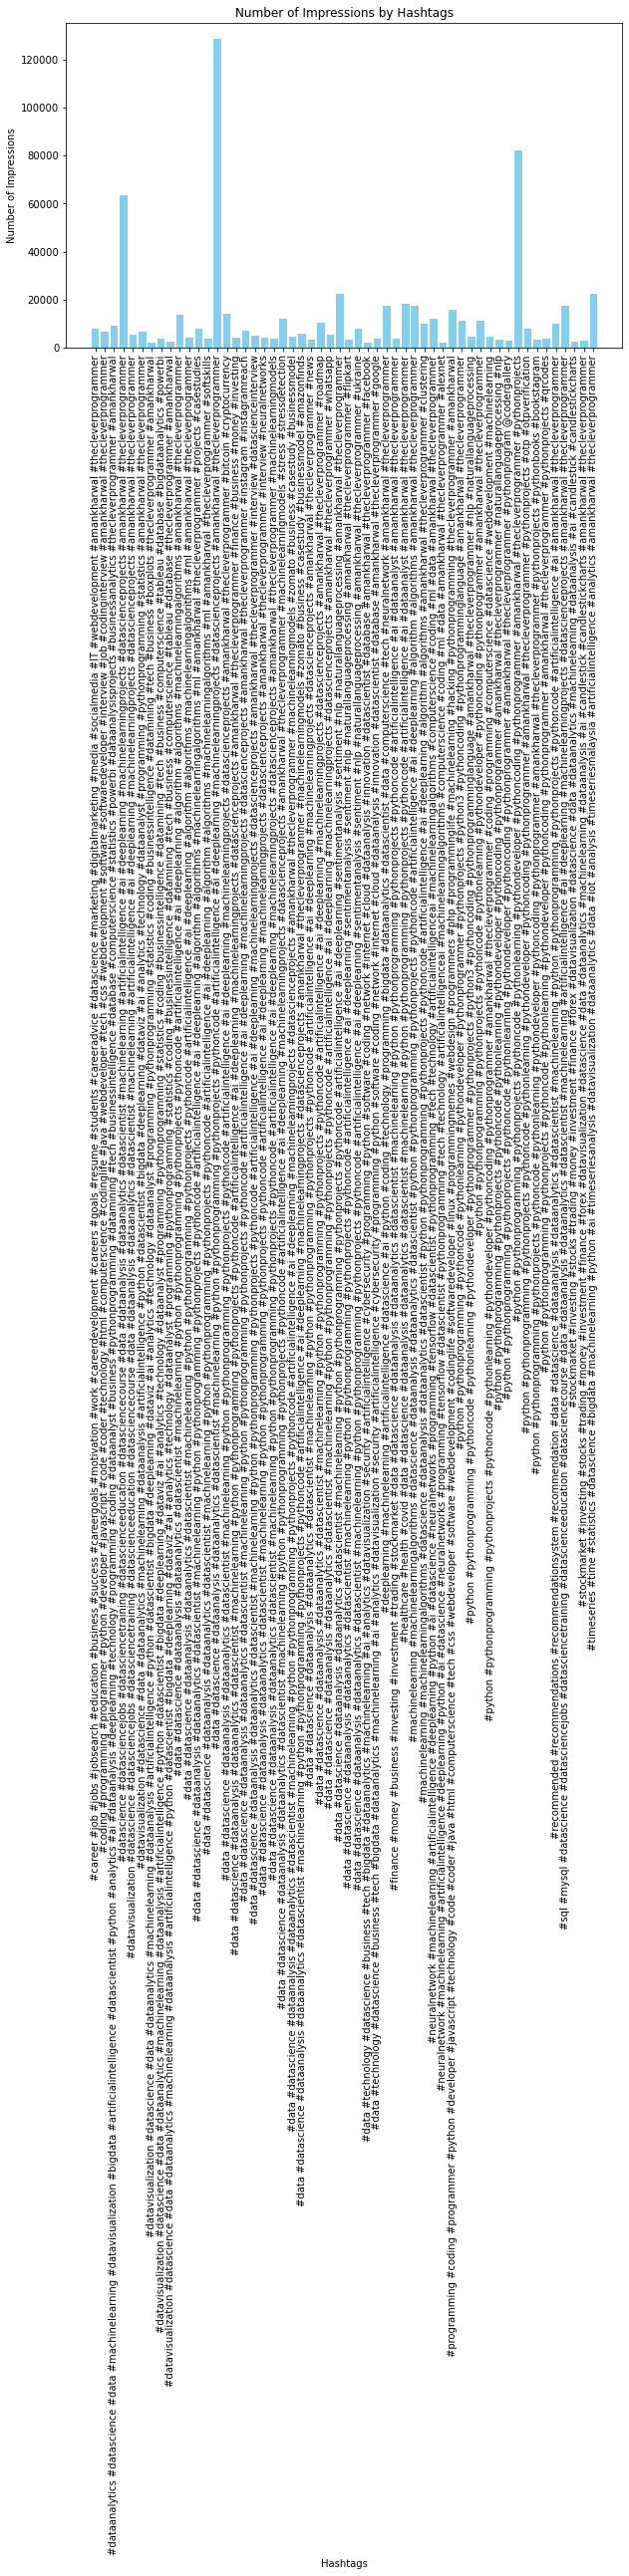

In [14]:
# Calculate total impressions for each hashtag
impressions_by_hashtag = df.groupby('Hashtags')['Impressions'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(impressions_by_hashtag['Hashtags'], impressions_by_hashtag['Impressions'], color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Number of Impressions')
plt.title('Number of Impressions by Hashtags')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()